In [1]:
import numpy as np
import glob
import pickle 
import csv
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
import matplotlib
%matplotlib inline
from scipy import stats  
import seaborn as sns
from matplotlib.lines import Line2D
import scipy as sp


In [2]:
#matplotlib.rcParams['text.usetex'] = True
matplotlib.rc('font',family='serif', serif=['Palatino'])
sns.set_style('white')

pgf_with_rc_fonts = {"pgf.texsystem": "pdflatex"}
matplotlib.rcParams.update(pgf_with_rc_fonts)

def set_style():
    sns.set(font='serif', font_scale=1.4)
    
   # Make the background white, and specify the
    # specific font family
    sns.set_style("white", {
        "font.family": "serif",
        "font.weight": "normal",
        "font.serif": ["Times", "Palatino", "serif"],
        'axes.facecolor': 'white',
        'lines.markeredgewidth': 1})

In [3]:
def plot_sig_line(ax, x1, x2, y1, h, padding=0.3):
    '''
    Plots the bracket thing denoting significance in plots. h controls how tall vertically the bracket is.
    Only need one y coordinate (y1) since the bracket is parallel to the x-axis.
    '''
    ax.plot([x1, x1, x2, x2], [y1, y1 + h, y1 + h, y1], linewidth=1, color='k')
    ax.text(0.5*(x1 + x2), y1 + h + padding * h, '*', color='k', fontsize=16, fontweight='normal')

In [4]:
person_names = {0: "Andreea", 1: "Andrea", 2: "Eli", 3: "Ravi", 4: "Hong", 5: "Ellis", 6: "Steven", 7:"Smitha", 8:"Simon", 9:"Erin", 10:"Mitch", 11:"Elizabeth"}
corrections_str = []
for file in glob.glob('betas/*_BETA_*.p'):
    corrections_str.append(file)
    
csv_table = [["Name", "Features known by R", "Features corrected by H", "Rational", "Correction #", "Timestamp", "Update", "Beta1", "Beta2", "Beta3"]]
    
for file_path in corrections_str:
    # Parse string to find features known and features corrected
    print "Parsing this file:", file_path
    str_list = file_path.split("_")
    method_idx = str_list.index("BETA")
    correction_idx = str_list.index("correction")
    end_idx = len(str_list)-1
    
    person_ID = person_names[int(str_list[1])]
    features_known = str_list[method_idx+1:correction_idx]
    features_corrected = str_list[correction_idx+1:-1]
    is_rational = not set(features_known).isdisjoint(features_corrected)
            
    features_known_str = ",".join(features_known)
    features_corrected_str = ",".join(features_corrected)
    
    print "Name of human:", person_ID
    print "Robot knew about these features:", features_known
    print "Human was asked to correct these features:", features_corrected  
    print "Was human rational?", is_rational
    betas = pickle.load(open(file_path, "rb"))
    if betas is None:
        continue
    timestamp = betas[:,0]
    betas = betas[:,1:]
    print "Timestamp of pushes:", timestamp
    print "Beta values:", betas
  
    # Look at update data
    update_str = "updates/updates_" + ('_').join(str_list[1:])
    updates = pickle.load(open(update_str, "rb"))
    updates = updates[:,1:]
    print "Updates:", updates, "\n"
    
    # Create csv data
    csv_row = [person_ID, features_known_str[:], features_corrected_str[:]]

    for i in range(len(timestamp)):
        is_rational_i = is_rational
        if is_rational:
            if 'table' in features_corrected:
                feat_idx = features_known.index('table')
                if updates[i,feat_idx] > -0.1:
                    is_rational_i = False
            if 'coffee' in features_corrected:
                feat_idx = features_known.index('coffee')
                if updates[i,feat_idx] > -0.1:
                    is_rational_i = False
            if 'human' in features_corrected:
                feat_idx = features_known.index('human')
                if updates[i,feat_idx] > -0.1:
                    is_rational_i = False
        csv_row_current = csv_row + [is_rational_i, i, timestamp[i]] + [updates[i,].tolist()] + betas[i,:].tolist() + [float('nan')]*(3-len(betas[i,:]))
        csv_table.append(csv_row_current)
    
csv_file = open('beta_pilot.csv', 'w')
with csv_file:
    writer = csv.writer(csv_file)
    writer.writerows(csv_table)
    
df = pd.DataFrame(data=csv_table[:][1:], columns=csv_table[:][0])

Parsing this file: betas/betas_1_B_BETA_human_correction_accident_1.p
Name of human: Andrea
Robot knew about these features: ['human']
Human was asked to correct these features: ['accident']
Was human rational? False
Timestamp of pushes: [ 4.64570308  9.85766697]
Beta values: [[ 0.04988554]
 [ 0.20730106]]
Updates: [[-0.21464616]
 [ 1.08244706]] 

Parsing this file: betas/betas_7_B_BETA_human_correction_table_1.p
Name of human: Smitha
Robot knew about these features: ['human']
Human was asked to correct these features: ['table']
Was human rational? False
Timestamp of pushes: [ 7.84293389]
Beta values: [[ 0.61597337]]
Updates: [[-0.57748885]] 

Parsing this file: betas/betas_6_B_BETA_table_coffee_correction_human_1.p
Name of human: Steven
Robot knew about these features: ['table', 'coffee']
Human was asked to correct these features: ['human']
Was human rational? False
Timestamp of pushes: [ 4.49922204]
Beta values: [[ 0.04720027  0.00103463]]
Updates: [[-0.15733646 -0.04953888]] 

Parsi


Parsing this file: betas/betas_10_B_BETA_table_coffee_human_correction_human_1.p
Name of human: Mitch
Robot knew about these features: ['table', 'coffee', 'human']
Human was asked to correct these features: ['human']
Was human rational? True
Timestamp of pushes: [ 14.36550403]
Beta values: [[ 0.01229829  0.00368767  0.58426809]]
Updates: [[-0.02607535 -0.02836631 -0.2949893 ]] 

Parsing this file: betas/betas_10_B_BETA_table_human_correction_coffee_1.p
Name of human: Mitch
Robot knew about these features: ['table', 'human']
Human was asked to correct these features: ['coffee']
Was human rational? False
Timestamp of pushes: [ 8.238451]
Beta values: [[ 0.16752966  0.25979918]]
Updates: [[ 0.06948522  0.1899676 ]] 

Parsing this file: betas/betas_9_B_BETA_human_correction_human_1.p
Name of human: Erin
Robot knew about these features: ['human']
Human was asked to correct these features: ['human']
Was human rational? True
Timestamp of pushes: [ 4.20352006]
Beta values: [[ 1.37712068]]
Upda

Timestamp of pushes: [ 3.00979495  3.69437885]
Beta values: [[ 0.27415147]
 [ 0.15759709]]
Updates: [[ 0.12037325]
 [ 0.12603284]] 

Parsing this file: betas/betas_10_B_BETA_coffee_human_correction_coffee_1.p
Name of human: Mitch
Robot knew about these features: ['coffee', 'human']
Human was asked to correct these features: ['coffee']
Was human rational? True
Timestamp of pushes: [ 9.74556112]
Beta values: [[ 0.4000191  0.       ]]
Updates: [[-0.17322517  0.18735416]] 

Parsing this file: betas/betas_3_B_BETA_table_coffee_human_correction_accident_1.p
Name of human: Ravi
Robot knew about these features: ['table', 'coffee', 'human']
Human was asked to correct these features: ['accident']
Was human rational? False
Timestamp of pushes: [ 14.27280617]
Beta values: [[ 0.00177672  0.01334454  0.90109352]]
Updates: [[-0.04610572 -0.22654306 -1.94499804]] 

Parsing this file: betas/betas_1_B_BETA_table_human_correction_coffee_1.p
Name of human: Andrea
Robot knew about these features: ['table',

Beta values: [[ 0.23806633]]
Updates: [[ 0.25378227]] 

Parsing this file: betas/betas_4_B_BETA_table_coffee_human_correction_accident_1.p
Name of human: Hong
Robot knew about these features: ['table', 'coffee', 'human']
Human was asked to correct these features: ['accident']
Was human rational? False
Timestamp of pushes: [ 13.25060606]
Beta values: [[ 3.98677248  0.04935882  0.        ]]
Updates: [[ 0.55949165 -0.36255118  0.72793502]] 

Parsing this file: betas/betas_9_B_BETA_coffee_human_correction_coffee_1.p
Name of human: Erin
Robot knew about these features: ['coffee', 'human']
Human was asked to correct these features: ['coffee']
Was human rational? True
Timestamp of pushes: [ 10.07182193]
Beta values: [[ 0.12954839  0.73144374]]
Updates: [[-0.17907664  0.38121327]] 

Parsing this file: betas/betas_6_B_BETA_table_coffee_correction_coffee_1.p
Name of human: Steven
Robot knew about these features: ['table', 'coffee']
Human was asked to correct these features: ['coffee']
Was human 

Human was asked to correct these features: ['table']
Was human rational? False
Timestamp of pushes: [ 6.23461604]
Beta values: [[ 0.09483816]]
Updates: [[ 0.35455035]] 

Parsing this file: betas/betas_2_B_BETA_coffee_correction_human_1.p
Name of human: Eli
Robot knew about these features: ['coffee']
Human was asked to correct these features: ['human']
Was human rational? False
Timestamp of pushes: [ 2.758569    3.80316591]
Beta values: [[ 0.00538305]
 [ 0.00324069]]
Updates: [[-0.04989254]
 [ 0.02727649]] 

Parsing this file: betas/betas_8_B_BETA_table_coffee_correction_coffee_1.p
Name of human: Simon
Robot knew about these features: ['table', 'coffee']
Human was asked to correct these features: ['coffee']
Was human rational? True
Timestamp of pushes: [ 4.44124699  6.23930502]
Beta values: [[ 0.8136207   0.25808346]
 [ 0.62570486  0.18988508]]
Updates: [[ 0.13476956 -0.20728461]
 [ 0.23121908 -0.33512307]] 

Parsing this file: betas/betas_1_B_BETA_table_human_correction_accident_1.p
Na

Parsing this file: betas/betas_3_B_BETA_table_coffee_correction_table_1.p
Name of human: Ravi
Robot knew about these features: ['table', 'coffee']
Human was asked to correct these features: ['table']
Was human rational? True
Timestamp of pushes: [ 7.08529282]
Beta values: [[ 3.083713    0.12503708]]
Updates: [[-0.28470933  0.27925361]] 

Parsing this file: betas/betas_8_B_BETA_table_coffee_correction_human_1.p
Name of human: Simon
Robot knew about these features: ['table', 'coffee']
Human was asked to correct these features: ['human']
Was human rational? False
Timestamp of pushes: [ 4.341079]
Beta values: [[ 0.00188991  0.01012661]]
Updates: [[-0.03337413 -0.15521387]] 

Parsing this file: betas/betas_3_B_BETA_table_human_correction_accident_1.p
Name of human: Ravi
Robot knew about these features: ['table', 'human']
Human was asked to correct these features: ['accident']
Was human rational? False
Timestamp of pushes: [ 8.72467303]
Beta values: [[  9.31328684e-04   1.04719805e+01]]
Upda

In [5]:
import numpy as np
import glob
import pickle 
import csv
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab

from scipy import stats  

person_names = {0: "Andreea", 1: "Andrea", 2: "Eli", 3: "Ravi", 4: "Hong", 5: "Ellis", 6: "Steven", 7:"Smitha", 8:"Simon", 9:"Erin", 10:"Mitch", 11:"Elizabeth"}
corrections_str = []
for file in glob.glob('betas/*_BETA_*.p'):
    corrections_str.append(file)
    
csv_table = [["Name", "R_feat", "H_feat", "Correction #", "Timestamp", "Update", "Intentional", "Beta"]]
    
for file_path in corrections_str:
    # Parse string to find features known and features corrected
    print "Parsing this file:", file_path
    str_list = file_path.split("_")
    method_idx = str_list.index("BETA")
    correction_idx = str_list.index("correction")
    end_idx = len(str_list)-1
    
    person_ID = person_names[int(str_list[1])]
    features_known = str_list[method_idx+1:correction_idx]
    features_corrected = str_list[correction_idx+1:-1]
    is_rational = not set(features_known).isdisjoint(features_corrected)
    
    betas = pickle.load(open(file_path, "rb"))
    if betas is None:
        continue
    timestamp = betas[:,0]
    betas = betas[:,1:]
        
    print "Name of human:", person_ID
    print "Robot knew about these features:", features_known
    print "Human was asked to correct these features:", features_corrected  
    print "Was human intentional?", is_rational
    print "Timestamp of pushes:", timestamp
    print "Beta values:", betas
  
    # Look at update data
    update_str = "updates/updates_" + ('_').join(str_list[1:])
    updates = pickle.load(open(update_str, "rb"))
    updates = updates[:,1:]
    print "Updates:", updates, "\n"
    
    # Create csv data
    for i in range(len(timestamp)):
        for j in range(len(betas[i])):
            if abs(updates[i,j]) < 0.1 or betas[i,j] == 0:
                continue
            is_rational = features_known[j] == features_corrected[0]
            csv_row_current = [person_ID, features_known[j], features_corrected[0], i, timestamp[i], updates[i,j], is_rational, betas[i,j]]
            csv_table.append(csv_row_current)
            print(csv_row_current)
    
csv_file = open('beta_offline.csv', 'w')
with csv_file:
    writer = csv.writer(csv_file)
    writer.writerows(csv_table)
    
df = pd.DataFrame(data=csv_table[:][1:], columns=csv_table[:][0])

Parsing this file: betas/betas_1_B_BETA_human_correction_accident_1.p
Name of human: Andrea
Robot knew about these features: ['human']
Human was asked to correct these features: ['accident']
Was human intentional? False
Timestamp of pushes: [ 4.64570308  9.85766697]
Beta values: [[ 0.04988554]
 [ 0.20730106]]
Updates: [[-0.21464616]
 [ 1.08244706]] 

['Andrea', 'human', 'accident', 0, 4.6457030773162842, -0.21464616234618461, False, 0.049885537315410552]
['Andrea', 'human', 'accident', 1, 9.8576669692993164, 1.0824470593841724, False, 0.20730106253787803]
Parsing this file: betas/betas_7_B_BETA_human_correction_table_1.p
Name of human: Smitha
Robot knew about these features: ['human']
Human was asked to correct these features: ['table']
Was human intentional? False
Timestamp of pushes: [ 7.84293389]
Beta values: [[ 0.61597337]]
Updates: [[-0.57748885]] 

['Smitha', 'human', 'table', 0, 7.8429338932037354, -0.57748885192260957, False, 0.6159733685799389]
Parsing this file: betas/betas_6

Robot knew about these features: ['table', 'human']
Human was asked to correct these features: ['coffee']
Was human intentional? False
Timestamp of pushes: [ 6.13255906]
Beta values: [[ 0.05530509  0.07293204]]
Updates: [[-0.03272032  0.09134223]] 

Parsing this file: betas/betas_9_B_BETA_table_coffee_human_correction_coffee_2.p
Name of human: Erin
Robot knew about these features: ['table', 'coffee', 'human']
Human was asked to correct these features: ['coffee']
Was human intentional? True
Timestamp of pushes: [ 6.40370798]
Beta values: [[ 0.3409526   0.11599435  0.84331757]]
Updates: [[ 0.12111867 -0.17907664  0.38121327]] 

['Erin', 'table', 'coffee', 0, 6.4037079811096191, 0.12111867361377548, False, 0.34095259801626382]
['Erin', 'coffee', 'coffee', 0, 6.4037079811096191, -0.17907664220040687, True, 0.1159943450016306]
['Erin', 'human', 'coffee', 0, 6.4037079811096191, 0.38121326690631463, False, 0.84331756649650402]
Parsing this file: betas/betas_9_B_BETA_table_correction_table_1.p

['Ellis', 'table', 'table', 2, 6.2646188735961914, 0.35343772100483051, True, 2.0325772155938773]
Parsing this file: betas/betas_7_B_BETA_coffee_human_correction_human_1.p
Name of human: Smitha
Robot knew about these features: ['coffee', 'human']
Human was asked to correct these features: ['human']
Was human intentional? True
Timestamp of pushes: [ 9.83605909]
Beta values: [[ 0.01802437  0.51787908]]
Updates: [[-0.07606484 -0.36126237]] 

['Smitha', 'human', 'human', 0, 9.8360590934753418, -0.36126237031106712, True, 0.51787908281375949]
Parsing this file: betas/betas_2_B_BETA_coffee_correction_accident_1.p
Name of human: Eli
Robot knew about these features: ['coffee']
Human was asked to correct these features: ['accident']
Was human intentional? False
Timestamp of pushes: [ 4.18040705  4.88212705  5.57953095]
Beta values: [[ 0.04871553]
 [ 0.03433693]
 [ 0.02566303]]
Updates: [[-0.30209034]
 [-0.45930606]
 [-0.09163078]] 

['Eli', 'coffee', 'accident', 0, 4.1804070472717285, -0.302090

Was human intentional? False
Timestamp of pushes: [ 3.35414004  4.54118204]
Beta values: [[  1.08987511e-02]
 [  3.49737387e-05]]
Updates: [[-0.15521387]
 [ 0.00350751]] 

['Simon', 'coffee', 'human', 0, 3.354140043258667, -0.15521386752609345, False, 0.010898751120943228]
Parsing this file: betas/betas_3_B_BETA_coffee_correction_coffee_1.p
Name of human: Ravi
Robot knew about these features: ['coffee']
Human was asked to correct these features: ['coffee']
Was human intentional? True
Timestamp of pushes: [ 4.48720098  5.08152413  5.68221116]
Beta values: [[ 1.05696046]
 [ 3.65282566]
 [ 6.07852452]]
Updates: [[-0.25117555]
 [-0.4730339 ]
 [-0.43510274]] 

['Ravi', 'coffee', 'coffee', 0, 4.4872009754180908, -0.25117554896961991, True, 1.056960461136127]
['Ravi', 'coffee', 'coffee', 1, 5.081524133682251, -0.47303390039022375, True, 3.652825659457994]
['Ravi', 'coffee', 'coffee', 2, 5.68221116065979, -0.43510274398935067, True, 6.0785245173960112]
Parsing this file: betas/betas_1_B_BETA_t

Parsing this file: betas/betas_6_B_BETA_table_coffee_human_correction_human_1.p
Name of human: Steven
Robot knew about these features: ['table', 'coffee', 'human']
Human was asked to correct these features: ['human']
Was human intentional? True
Timestamp of pushes: [ 12.38385201]
Beta values: [[ 0.04811446  0.00102061  0.        ]]
Updates: [[-0.15733646 -0.04953888 -1.18864824]] 

['Steven', 'table', 'human', 0, 12.383852005004883, -0.15733646071742413, False, 0.048114464389470417]
Parsing this file: betas/betas_6_B_BETA_table_correction_accident_1.p
Name of human: Steven
Robot knew about these features: ['table']
Human was asked to correct these features: ['accident']
Was human intentional? False
Timestamp of pushes: [  3.93903613   4.59260201  10.52112508  11.19883418  14.93913603]
Beta values: [[ 0.02709924]
 [ 0.02472446]
 [ 1.75888808]
 [ 0.05361474]
 [ 0.01101156]]
Updates: [[ 0.43122677]
 [-0.03895742]
 [ 0.21443553]
 [ 0.09876658]
 [-0.0300983 ]] 

['Steven', 'table', 'acciden

Parsing this file: betas/betas_8_B_BETA_coffee_correction_table_1.p
Name of human: Simon
Robot knew about these features: ['coffee']
Human was asked to correct these features: ['table']
Was human intentional? False
Timestamp of pushes: [ 4.9518559   5.94406486  6.93100691  7.92280197]
Beta values: [[ 0.00270385]
 [ 0.1173006 ]
 [ 0.04578018]
 [ 0.04956499]]
Updates: [[-0.05748511]
 [ 0.24201898]
 [ 0.17316442]
 [ 0.2445241 ]] 

['Simon', 'coffee', 'table', 1, 5.9440648555755615, 0.24201898010822021, False, 0.11730060334509235]
['Simon', 'coffee', 'table', 2, 6.931006908416748, 0.17316442377653374, False, 0.045780176299378916]
['Simon', 'coffee', 'table', 3, 7.9228019714355469, 0.24452410212696662, False, 0.049564988194387198]
Parsing this file: betas/betas_1_B_BETA_table_correction_human_1.p
Name of human: Andrea
Robot knew about these features: ['table']
Human was asked to correct these features: ['human']
Was human intentional? False
Timestamp of pushes: [ 3.69358897  4.38036394  5.0

In [6]:
# Create P(beta | intent, feature) from data

# intent = false, feature = table
P_beta_00 = df.loc[(df['R_feat'] == 'table')&(df['H_feat'] != 'accident')&(df['Intentional'] == False)]['Beta']
update_00 = df.loc[(df['R_feat'] == 'table')&(df['H_feat'] != 'accident')&(df['Intentional'] == False)]['Update']

# intent = true, feature = table
P_beta_10 = df.loc[(df['R_feat'] == 'table')&(df['H_feat'] != 'accident')&(df['Intentional'] == True)]['Beta']
update_10 = df.loc[(df['R_feat'] == 'table')&(df['H_feat'] != 'accident')&(df['Intentional'] == True)]['Update']

# intent = false, feature = coffee
P_beta_01 = df.loc[(df['R_feat'] == 'coffee')&(df['H_feat'] != 'accident')&(df['Intentional'] == False)]['Beta']
update_01 = df.loc[(df['R_feat'] == 'coffee')&(df['H_feat'] != 'accident')&(df['Intentional'] == False)]['Update']

# intent = true, feature = coffee
P_beta_11 = df.loc[(df['R_feat'] == 'coffee')&(df['H_feat'] != 'accident')&(df['Intentional'] == True)]['Beta']
update_11 = df.loc[(df['R_feat'] == 'coffee')&(df['H_feat'] != 'accident')&(df['Intentional'] == True)]['Update']

# intent = false, feature = human
P_beta_02 = df.loc[(df['R_feat'] == 'human')&(df['H_feat'] != 'accident')&(df['Intentional'] == False)]['Beta']
update_02 = df.loc[(df['R_feat'] == 'human')&(df['H_feat'] != 'accident')&(df['Intentional'] == False)]['Update']

# intent = true, feature = human
P_beta_12 = df.loc[(df['R_feat'] == 'human')&(df['H_feat'] != 'accident')&(df['Intentional'] == True)]['Beta']
update_12 = df.loc[(df['R_feat'] == 'human')&(df['H_feat'] != 'accident')&(df['Intentional'] == True)]['Update']


1.83701582842 0 0.150583961407
2.79921875 0 0.4212940611
1.67451171875 0 0.05
2.8169921875 0 0.3
2.14693459432 0 0.227738059531
5.0458984375 0 0.25


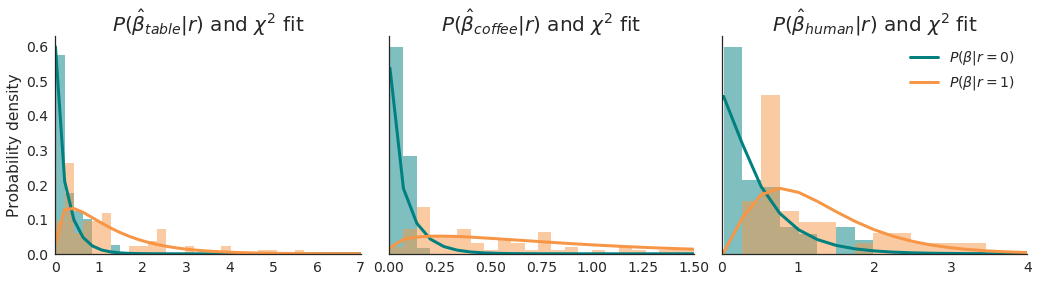

In [18]:
import matplotlib
import os

fig = plt.gcf()
ax1 = plt.subplot2grid((2, 6), (0, 0), rowspan=2, colspan=2)
ax2 = plt.subplot2grid((2, 6), (0, 2), rowspan=2, colspan=2)
ax3 = plt.subplot2grid((2, 6), (0, 4), rowspan=2, colspan=2)

set_style()
indep_color = '#f79646'
joint_color = '#008080'
matplotlib.rcParams.update({'font.size': 22})

######## Table ########

(data1, data2) = (P_beta_00, P_beta_10)
num_bins = 40

# the histogram of the data
weights1 = np.ones_like(data1) / (len(data1))
weights2 = np.ones_like(data2) / (len(data2))
bins=np.histogram(np.hstack((data1,data2)), bins=num_bins)[1]
_, bins1, _ = ax1.hist(data1, bins, weights=weights1, facecolor=joint_color, alpha=0.5)
_, bins2, _ = ax1.hist(data2, bins, weights=weights2, facecolor=indep_color, alpha=0.5)

# add a 'best fit' line after rejecting outliers
df1, loc1, scale1 =  stats.chi2.fit(data1, floc=0)
df2, loc2, scale2 =  stats.chi2.fit(data2, floc=0, fscale=0.4212940611)
print df1, loc1, scale1
print df2, loc2, scale2
y1 = stats.chi2.pdf(bins1, df1, loc1, scale1)
y2 = stats.chi2.pdf(bins2, df2, loc2, scale2)

ax1.set_title(r'$P(\hat{\beta}_{table}|r)$ and $\chi^2$ fit', fontsize=20, fontweight='normal')
ax1.plot(bins1, y1/sum(y1), '-', color=joint_color, linewidth=3.0)
ax1.plot(bins2, y2/sum(y2), '-', color=indep_color, linewidth=3.0)
ax1.set_xlim([0, 7])
ax1.set_ylabel('Probability density')
plt.sca(ax1)

######## Coffee ########

(data1, data2) = (P_beta_01, P_beta_11)
num_bins = 200

# the histogram of the data
weights1 = np.ones_like(data1) / (len(data1))
weights2 = np.ones_like(data2) / (len(data2))
bins=np.histogram(np.hstack((data1,data2)), bins=num_bins)[1]
_, bins1, _ = ax2.hist(data1, bins, weights=weights1, facecolor=joint_color, alpha=0.5)
_, bins2, _ = ax2.hist(data2, bins, weights=weights2, facecolor=indep_color, alpha=0.5)

# add a 'best fit' line after rejecting outliers
df1, loc1, scale1 =  stats.chi2.fit(data1, floc=0, fscale=0.05)
df2, loc2, scale2 =  stats.chi2.fit(data2, floc=0, fscale=0.3)
print df1, loc1, scale1
print df2, loc2, scale2
y1 = stats.chi2.pdf(bins1, df1, loc1, scale1)
y2 = stats.chi2.pdf(bins2, df2, loc2, scale2)

ax2.set_title(r'$P(\hat{\beta}_{coffee}|r)$ and $\chi^2$ fit', fontsize=20, fontweight='normal')
ax2.plot(bins1, y1/sum(y1), '-', color=joint_color, linewidth=3.0)
ax2.plot(bins2, y2/sum(y2), '-', color=indep_color, linewidth=3.0)
ax2.set_xlim([0, 1.5])
ax2.set_yticks([])
plt.sca(ax2)

######## Human ########

(data1, data2) = (P_beta_02, P_beta_12)
num_bins = 25

# the histogram of the data
weights1 = np.ones_like(data1) / (len(data1))
weights2 = np.ones_like(data2) / (len(data2))
bins=np.histogram(np.hstack((data1,data2)), bins=num_bins)[1]
_, bins1, _ = ax3.hist(data1, bins, weights=weights1, facecolor=joint_color, alpha=0.5)
_, bins2, _ = ax3.hist(data2, bins, weights=weights2, facecolor=indep_color, alpha=0.5)

# add a 'best fit' line after rejecting outliers
df1, loc1, scale1 =  stats.chi2.fit(data1, floc=0)
df2, loc2, scale2 =  stats.chi2.fit(data2, floc=0, fscale=0.25)
print df1, loc1, scale1
print df2, loc2, scale2
y1 = stats.chi2.pdf(bins1, df1, loc1, scale1)
y2 = stats.chi2.pdf(bins2, df2, loc2, scale2)

ax3.set_title(r'$P(\hat{\beta}_{human}|r)$ and $\chi^2$ fit', fontsize=20, fontweight='normal')
ax3.plot(bins1, y1/sum(y1), '-', color=joint_color, linewidth=3.0)
ax3.plot(bins2, y2/sum(y2), '-', color=indep_color, linewidth=3.0)
ax3.set_xlim([0, 4])
ax3.set_yticks([])
plt.sca(ax3)

ax3.legend([r'$P(\beta|r=0)$',r'$P(\beta|r=1)$'],
            loc='upper right',
            ncol=1, 
            fontsize=14,
            bbox_to_anchor=(1., 1.0))

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0)
sns.despine(fig)
fig.set_figwidth(15)
fig.set_figheight(4)

plt.savefig('histograms_all.pdf', bbox_inches='tight')


1.80041376328 0.00299419147123 0.154878185097
1.36737688926 0.112212634075 1.05476238984


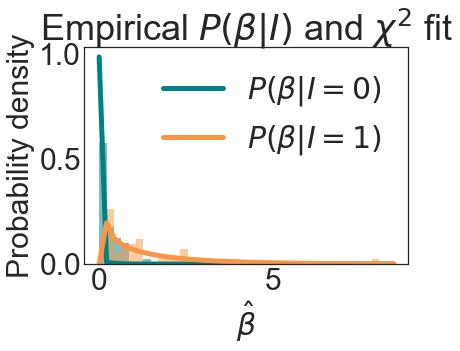

Saved weights figure.


In [18]:
plot_density(P_beta_00, P_beta_10, 40, "table", savefig=True)

1.62070513714 0.0068617251698 0.0289367690935
1.28972898761 0.0376166490836 0.79839944817


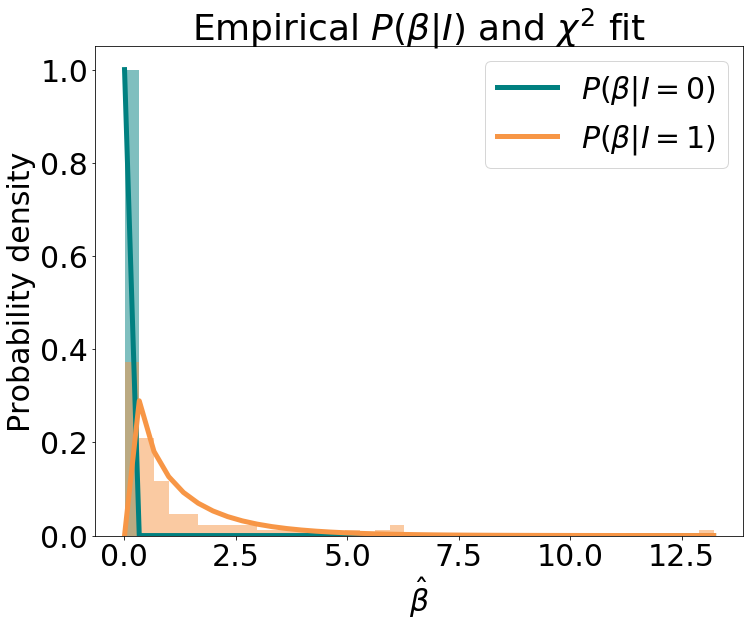

Saved weights figure.


In [8]:
plot_density(P_beta_01, P_beta_11, 40, "coffee", savefig=True)

0.899625418404 0.022880270078 1.29109899886
1.79523381954 0.304278367258 0.580684081529


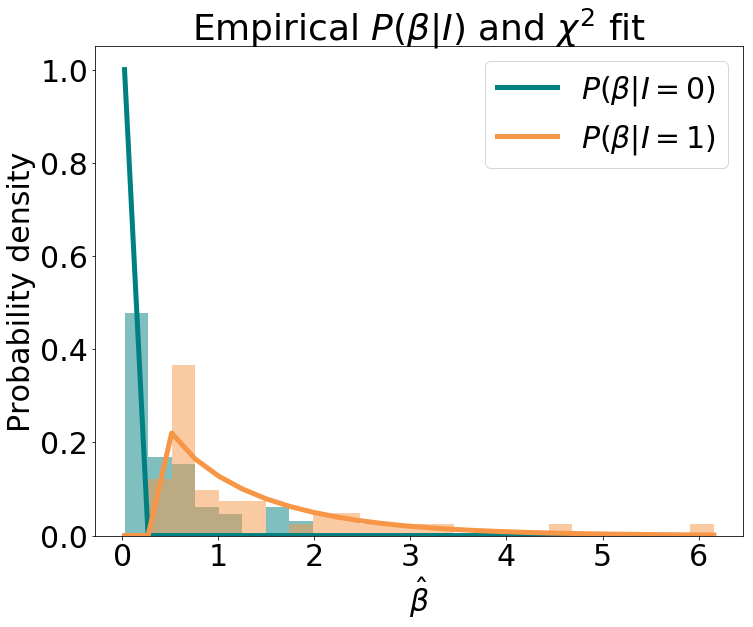

Saved weights figure.


In [9]:
plot_density(P_beta_02, P_beta_12, 25, "human", savefig=True)

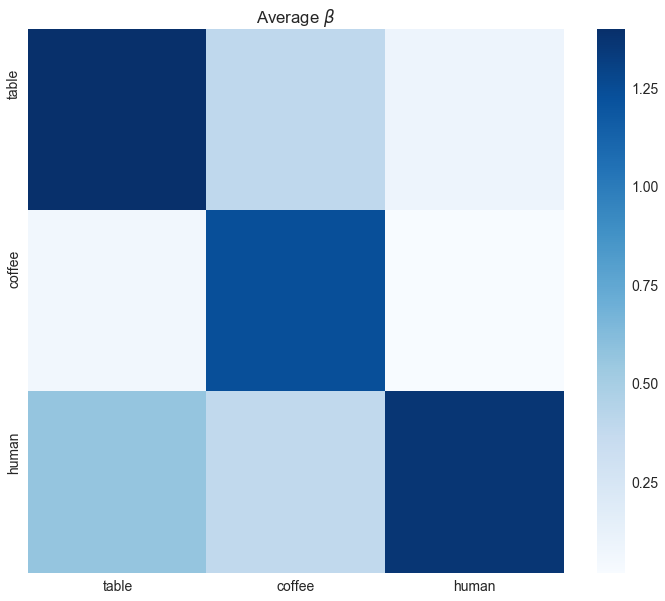

In [85]:
import seaborn as sns
import pandas as pd
import numpy as np

# Plot R = table; H = table
t_t = df.loc[(df['R_feat'] == 'table')&(df['H_feat'] == 'table')]['Beta']
t_c = df.loc[(df['R_feat'] == 'table')&(df['H_feat'] == 'coffee')]['Beta']
t_h = df.loc[(df['R_feat'] == 'table')&(df['H_feat'] == 'human')]['Beta']
t_a = df.loc[(df['R_feat'] == 'table')&(df['H_feat'] == 'accident')]['Beta']

c_t = df.loc[(df['R_feat'] == 'coffee')&(df['H_feat'] == 'table')]['Beta']
c_c = df.loc[(df['R_feat'] == 'coffee')&(df['H_feat'] == 'coffee')]['Beta']
c_h = df.loc[(df['R_feat'] == 'coffee')&(df['H_feat'] == 'human')]['Beta']
c_a = df.loc[(df['R_feat'] == 'coffee')&(df['H_feat'] == 'accident')]['Beta']

h_t = df.loc[(df['R_feat'] == 'human')&(df['H_feat'] == 'table')]['Beta']
h_c = df.loc[(df['R_feat'] == 'human')&(df['H_feat'] == 'coffee')]['Beta']
h_h = df.loc[(df['R_feat'] == 'human')&(df['H_feat'] == 'human')]['Beta']
h_a = df.loc[(df['R_feat'] == 'human')&(df['H_feat'] == 'accident')]['Beta']

data = [[np.mean(t_t),np.mean(t_c),np.mean(t_h)],[np.mean(c_t),np.mean(c_c),np.mean(c_h)],[np.mean(h_t),np.mean(h_c),np.mean(h_h)]]

matplotlib.rcParams.update({'font.size': 30})
plt.figure(figsize=(12,10))
sns.heatmap(data,cmap="Blues")
plt.xticks([0.5,1.5,2.5], ["table", "coffee", "human"])
plt.yticks([0.25,1.25,2.25], ["table", "coffee", "human"])
plt.title(r"Average $\beta$")
plt.show()

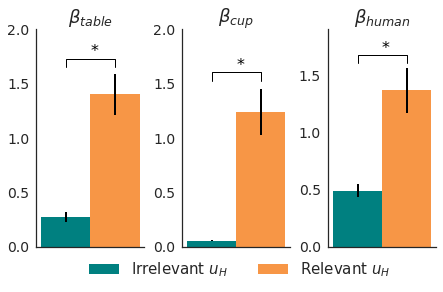

In [119]:
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig = plt.gcf()
ax1 = plt.subplot2grid((1, 6), (0, 0))
ax2 = plt.subplot2grid((1, 6), (0, 1))
ax3 = plt.subplot2grid((1, 6), (0, 2))

set_style()
relevant_color = '#f79646'
irrelevant_color = '#008080'

##### Table #####
ax1.set_title(r'$\beta_{table}$', fontsize=18, fontweight='normal')
r1 = ax1.bar([0.0], 
             [P_beta_00.mean()], 
             yerr=[P_beta_00.sem()], 
             color=[irrelevant_color], 
             ecolor='black', 
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
r2 = ax1.bar([1.0], 
             [P_beta_10.mean()], 
             yerr=[P_beta_10.sem()], 
             color=[relevant_color], 
             ecolor='black',
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
plot_sig_line(ax1, 0, 1, 1.65, 0.08)
ax1.set_ylim([0, 2])
#ax1.set_xlim([-0.25, 2.25])
plt.sca(ax1)
plt.xticks([])
# ax1.set_ylabel('time (s)', fontsize=16, fontweight='normal')
################

##### Coffee #####
ax2.set_title(r'$\beta_{cup}$', fontsize=18, fontweight='normal')
r1 = ax2.bar([0.0], 
             [P_beta_01.mean()], 
             yerr=[P_beta_01.sem()], 
             color=[irrelevant_color], 
             ecolor='black', 
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
r2 = ax2.bar([1.0], 
             [P_beta_11.mean()], 
             yerr=[P_beta_11.sem()], 
             color=[relevant_color], 
             ecolor='black',
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
plot_sig_line(ax2, 0, 1, 1.525, 0.08)
ax2.set_ylim([0, 2])
#ax2.set_xlim([-0.25, 2.25])
plt.sca(ax2)
plt.xticks([])
# ax2.set_ylabel('time (s)', fontsize=16, fontweight='normal')
################

##### Human #####
ax3.set_title(r'$\beta_{human}$', fontsize=18, fontweight='normal')
r1 = ax3.bar([0.0], 
             [P_beta_02.mean()], 
             yerr=[P_beta_02.sem()], 
             color=[irrelevant_color], 
             ecolor='black', 
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
r2 = ax3.bar([1.0], 
             [P_beta_12.mean()], 
             yerr=[P_beta_12.sem()], 
             color=[relevant_color], 
             ecolor='black',
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
plot_sig_line(ax3, 0, 1, 1.6, 0.07)
ax3.set_ylim([0, 1.9])
#ax3.set_xlim([-0.25, 2.25])
plt.sca(ax3)
plt.xticks([])
# ax2.set_ylabel('time (s)', fontsize=16, fontweight='normal')
################

leg = ax3.legend((r1[0], r2[0]), 
                ('Irrelevant $u_H$', 'Relevant $u_H$'), 
                loc='title',
                ncol=2, 
                fontsize=15,
                bbox_to_anchor=(0.7, 0.0))

plt.subplots_adjust(wspace=0.35)

sns.despine(fig)
fig.set_figwidth(15)
fig.set_figheight(4)

plt.savefig('features_relevant_barplots.pdf', bbox_inches='tight')

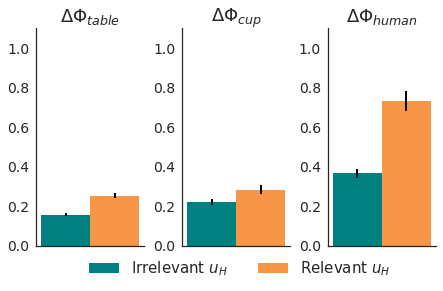

In [117]:
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig = plt.gcf()
ax1 = plt.subplot2grid((1, 6), (0, 0))
ax2 = plt.subplot2grid((1, 6), (0, 1))
ax3 = plt.subplot2grid((1, 6), (0, 2))

set_style()
relevant_color = '#f79646'
irrelevant_color = '#008080'

##### Time #####
ax1.set_title(r'$\Delta\Phi_{table}$', fontsize=18, fontweight='normal')
r1 = ax1.bar([0.0], 
             [abs(update_00).mean()], 
             yerr=[abs(update_00).sem()], 
             color=[irrelevant_color], 
             ecolor='black', 
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
r2 = ax1.bar([1.0], 
             [abs(update_10).mean()], 
             yerr=[abs(update_10).sem()], 
             color=[relevant_color], 
             ecolor='black',
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
#plot_sig_line(ax1, 0, 1, 0.4, 0.05)
ax1.set_ylim([0, 1.1])
#ax1.set_xlim([-0.25, 2.25])
plt.sca(ax1)
plt.xticks([])
# ax1.set_ylabel('time (s)', fontsize=16, fontweight='normal')
################

##### Runs #####
ax2.set_title(r'$\Delta\Phi_{cup}$', fontsize=18, fontweight='normal')
r1 = ax2.bar([0.0], 
             [abs(update_01).mean()], 
             yerr=[abs(update_01).sem()], 
             color=[irrelevant_color], 
             ecolor='black', 
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
r2 = ax2.bar([1.0], 
             [abs(update_11).mean()], 
             yerr=[abs(update_11).sem()], 
             color=[relevant_color], 
             ecolor='black',
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
#plot_sig_line(ax2, 0, 1, 0.4, 0.05)
ax2.set_ylim([0, 1.1])
#ax2.set_xlim([-0.25, 2.25])
plt.sca(ax2)
plt.xticks([])
# ax2.set_ylabel('time (s)', fontsize=16, fontweight='normal')
################

##### Ease of use #####
ax3.set_title(r'$\Delta\Phi_{human}$', fontsize=18, fontweight='normal')
r1 = ax3.bar([0.0], 
             [abs(update_02).mean()], 
             yerr=[abs(update_02).sem()], 
             color=[irrelevant_color], 
             ecolor='black', 
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
r2 = ax3.bar([1.0], 
             [abs(update_12).mean()], 
             yerr=[abs(update_12).sem()], 
             color=[relevant_color], 
             ecolor='black',
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
#plot_sig_line(ax3, 0, 1, 0.85, 0.05)
ax3.set_ylim([0, 1.1])
#ax3.set_xlim([-0.25, 2.25])
plt.sca(ax3)
plt.xticks([])
# ax2.set_ylabel('time (s)', fontsize=16, fontweight='normal')
################

leg = ax3.legend((r1[0], r2[0]), 
                ('Irrelevant $u_H$', 'Relevant $u_H$'), 
                loc='title',
                ncol=2, 
                fontsize=15,
                bbox_to_anchor=(0.7, 0))

plt.subplots_adjust(wspace=0.35)

sns.despine(fig)
fig.set_figwidth(15)
fig.set_figheight(4)

plt.savefig('update_relevant_barplots.pdf', bbox_inches='tight')

In [ ]:
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig = plt.gcf()
ax1 = plt.subplot2grid((1, 6), (0, 0))
ax2 = plt.subplot2grid((1, 6), (0, 1))
ax3 = plt.subplot2grid((1, 6), (0, 2))

set_style()
relevant_color = '#f79646'
irrelevant_color = '#008080'

##### Table #####
ax1.set_title(r'$\beta_{table}$', fontsize=16, fontweight='normal')
r1 = ax1.bar([0.0], 
             [t_t.mean()], 
             yerr=[t_t.sem()], 
             color=[relevant_color], 
             ecolor='black', 
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
r2 = ax1.bar([1.0], 
             [t_c.mean()], 
             yerr=[t_c.sem()], 
             color=[irrelevant_color], 
             ecolor='black',
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
r3 = ax1.bar([2.0], 
             [t_h.mean()], 
             yerr=[t_h.sem()], 
             color=[irrelevant_color], 
             ecolor='black',
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
r4 = ax1.bar([3.0], 
             [t_a.mean()], 
             yerr=[t_a.sem()], 
             color=[irrelevant_color], 
             ecolor='black',
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
#plot_sig_line(ax1, 0, 1, 1.65, 0.08)
ax1.set_ylim([0, 1.7])
#ax1.set_xlim([-0.25, 2.25])
plt.sca(ax1)
plt.xticks([])
# ax1.set_ylabel('time (s)', fontsize=16, fontweight='normal')
################

##### Coffee #####
ax2.set_title(r'$\beta_{cup}$', fontsize=16, fontweight='normal')
r1 = ax2.bar([0.0], 
             [c_t.mean()], 
             yerr=[c_t.sem()], 
             color=[irrelevant_color], 
             ecolor='black', 
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
r2 = ax2.bar([1.0], 
             [c_c.mean()], 
             yerr=[c_c.sem()], 
             color=[relevant_color], 
             ecolor='black',
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
r3 = ax2.bar([2.0], 
             [c_h.mean()], 
             yerr=[c_h.sem()], 
             color=[irrelevant_color], 
             ecolor='black',
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
r4 = ax2.bar([3.0], 
             [c_a.mean()], 
             yerr=[c_a.sem()], 
             color=[irrelevant_color], 
             ecolor='black',
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
#plot_sig_line(ax2, 0, 1, 1.525, 0.08)
ax2.set_ylim([0, 1.7])
#ax2.set_xlim([-0.25, 2.25])
plt.sca(ax2)
plt.xticks([])
# ax2.set_ylabel('time (s)', fontsize=16, fontweight='normal')
################

##### Human #####
ax3.set_title(r'$\beta_{human}$', fontsize=16, fontweight='normal')
r1 = ax3.bar([0.0], 
             [h_t.mean()], 
             yerr=[t_h.sem()], 
             color=[irrelevant_color], 
             ecolor='black', 
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
r2 = ax3.bar([1.0], 
             [h_c.mean()], 
             yerr=[h_c.sem()], 
             color=[irrelevant_color], 
             ecolor='black',
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
r2 = ax3.bar([2.0], 
             [h_h.mean()], 
             yerr=[h_h.sem()], 
             color=[relevant_color], 
             ecolor='black',
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
r4 = ax3.bar([3.0], 
             [h_a.mean()], 
             yerr=[h_a.sem()], 
             color=[irrelevant_color], 
             ecolor='black',
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
#plot_sig_line(ax3, 0, 1, 1.6, 0.07)
ax3.set_ylim([0, 1.7])
#ax3.set_xlim([-0.25, 2.25])
plt.sca(ax3)
plt.xticks([])
# ax2.set_ylabel('time (s)', fontsize=16, fontweight='normal')
################

#leg = ax3.legend((r1[0], r2[0], r3[0]), 
#                ('Table $u_H$', 'Coffee $u_H$', 'Human $u_H$'), 
#                loc='upper right',
#                ncol=1, 
#                fontsize=11,
#                bbox_to_anchor=(2., 1.0))

plt.subplots_adjust(wspace=0.35)

sns.despine(fig)
fig.set_figwidth(15)
fig.set_figheight(4)

plt.savefig('features_split_barplots.pdf', bbox_inches='tight')